# Total uncertainty space analysis
* EMA Society's response to climate change
* Name: Sebastiaan Greeven
* Date: 12-5-2015
#### Introduction
This notebook contains the main analysis for the model on society's response to climate change. The following analysis will be executed in this part of the analysis:

1. Initialisation of the analysis
2. Visualisation of the uncertainty space
3. Joint visualisation of the model outcomes
4. PRIM analysis
5. Reducing uncertainty space analysis

## 1. Initialisation of the analysis
To initialse the analysis, plotting settings are defined and required Python packages are imported. The path directing to the documents on the EMA workbench is appended. Seaborn is imported for a better visualisation of the graphs. The results are loaded into the notebook.

In [1]:
sns.set_palette("deep")

In [4]:
from ema_workbench.analysis.plotting import lines, envelopes
from ema_workbench.analysis.plotting_util import VIOLIN, KDE
from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter, pairs_density
from ema_workbench.analysis import prim
from ema_workbench.util import load_results, ema_logging

import mpld3

In [5]:
ema_logging.log_to_stderr(ema_logging.INFO)

results = load_results(r'./data/full 1000 exp 100 rep.tar.gz')

[INFO] results loaded succesfully from ./data/full 1000 exp 100 rep.tar.gz


## 2. Visualisation of the uncertainty space
In this section the consequences of the deep uncertainties influencing society's response to climate change are illustrated by displaying the graphs of 1000 model runs each being replicated 100 times on the following outcomes of interest:

    * Cumulative GHG reduction
    * Anual GHG reduction
    * Bottom-up mitigation ratio
    * Total climate disaster effect
    * Total agreement effect

For each outcome two graphs are created. The graphs entitled '_mean' represent the means of the 100 replications of each of the 1000 experiments. The graphs entitled '_std' represent the standard deviations of the 100 replications of each of the 1000 experiments.

The shaded blue areas in the graphs represent the range of outcomes at any given point in time. Each graph shows 10 individual experiments. On the right side of the graph a violin density plot is given. The violin density plot shows the density of the endstates of the experiments, with dotted lines representing the mean, first and third quartile like in a boxplot.

**Conclusion**
An obvious observation of the graphs is that the range in model outcomes is large. This is in line with the deep uncertainty that has been related to the system in which society's response to climate change takes place. In the upcoming analyses, the uncertainty space will be explored in two ways:

* Model outcomes are plotted against each other. In this way possible correlation between model outcomes can be analysed.
* Subspaces of the uncertainty space are analysed. By using PRIM analysis, it is attempted to find sets of input parameters that are significantly present in parts of the subspace. 

[u'AnnualGHGreduction_mean', u'BottomUpMitigationRatio_std', u'TotalClimateDisasterEffect_mean', u'CumulativeGHGreduction_std', u'BottomUpMitigationRatio_mean', u'AnnualGHGreduction_std', u'TotalClimateDisasterEffect_std', u'TotalAgreementEffect_mean', u'CumulativeGHGreduction_mean', u'TotalAgreementEffect_std']


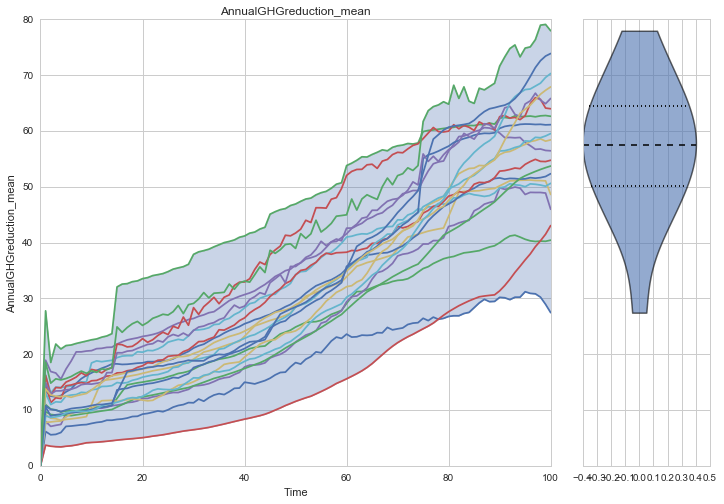

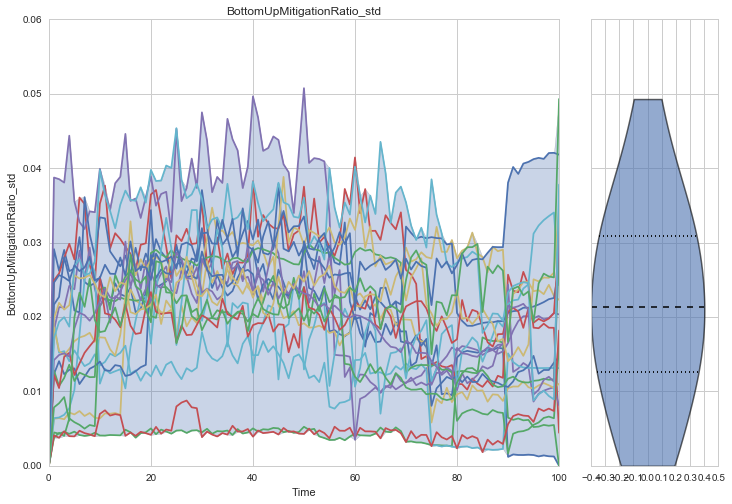

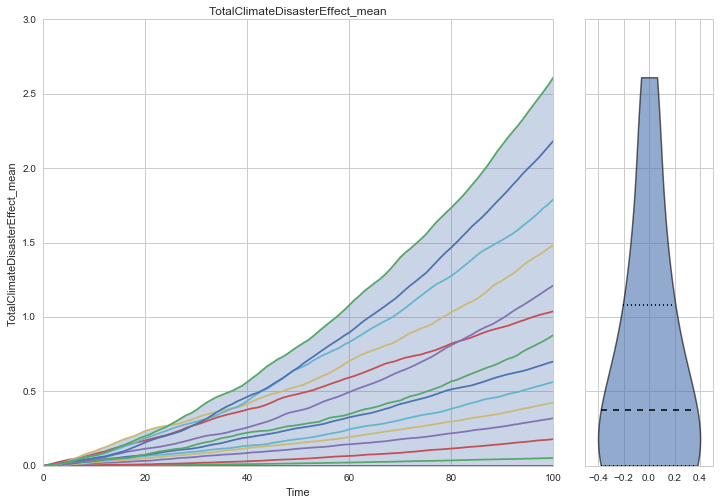

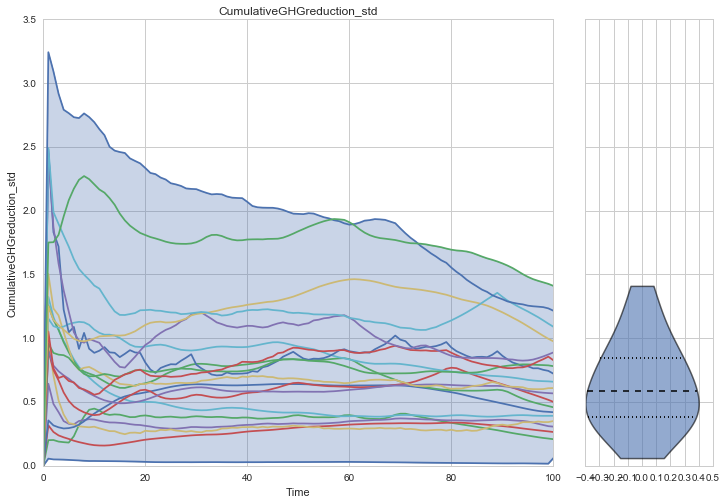

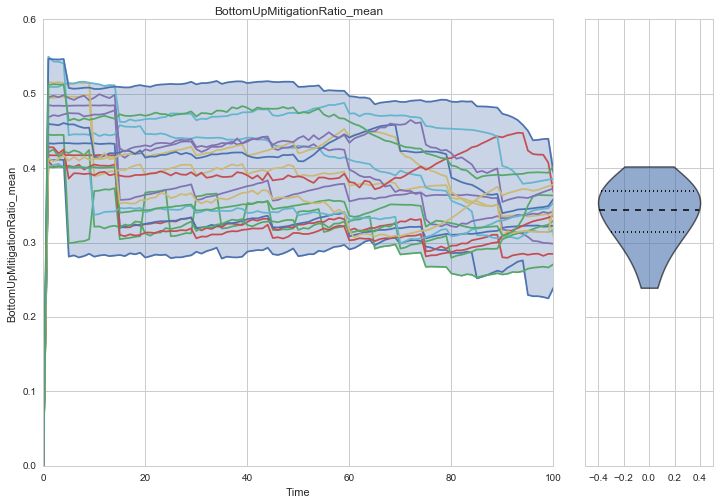

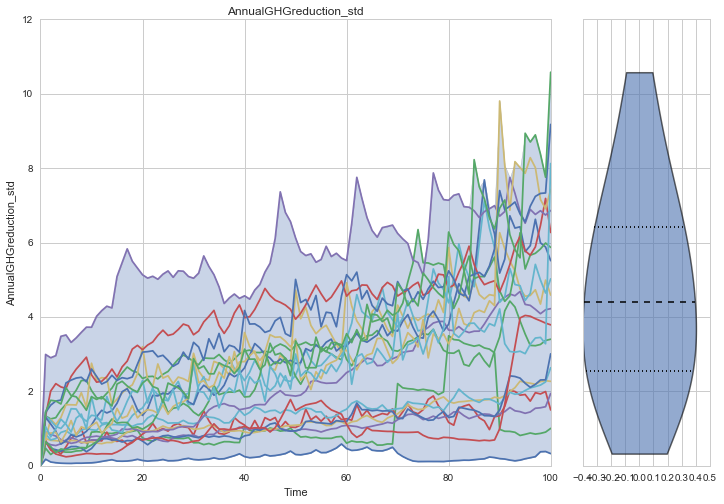

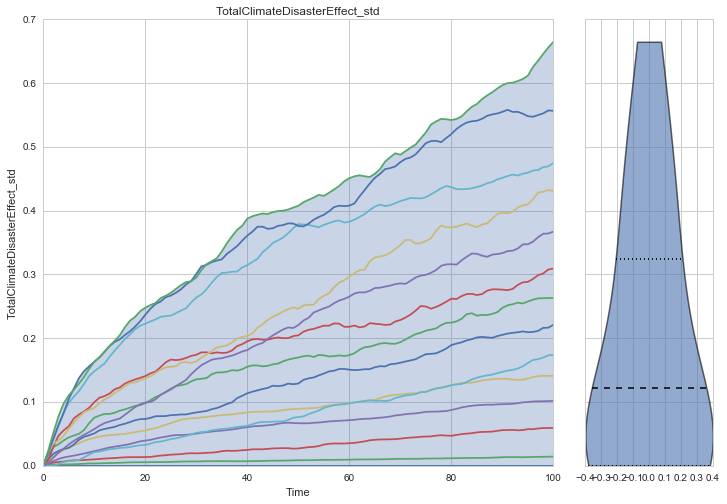

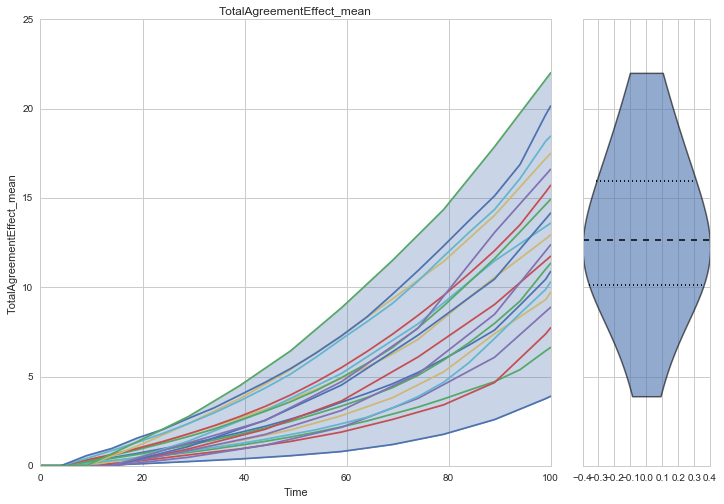

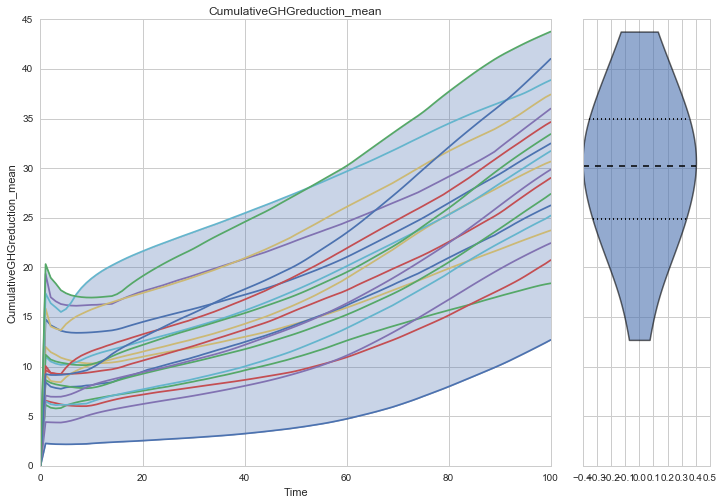

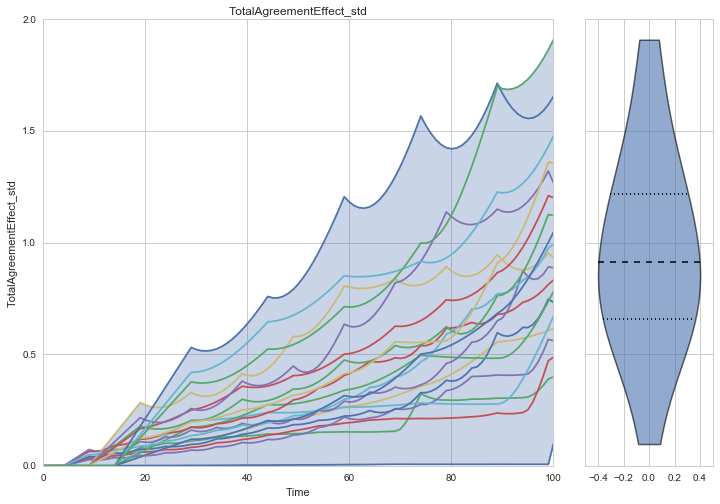

In [7]:
experiments, outcomes = results
oois = outcomes.keys()
print oois
for ooi in oois:
    data_to_sort_by = outcomes[ooi][:,-1]
    indices = np.argsort(data_to_sort_by)
    indices = indices[1:indices.shape[0]:50]  
    
    lines(results, outcomes_to_show=ooi, density=VIOLIN, 
          show_envelope=True, experiments_to_show=indices)

plt.show()

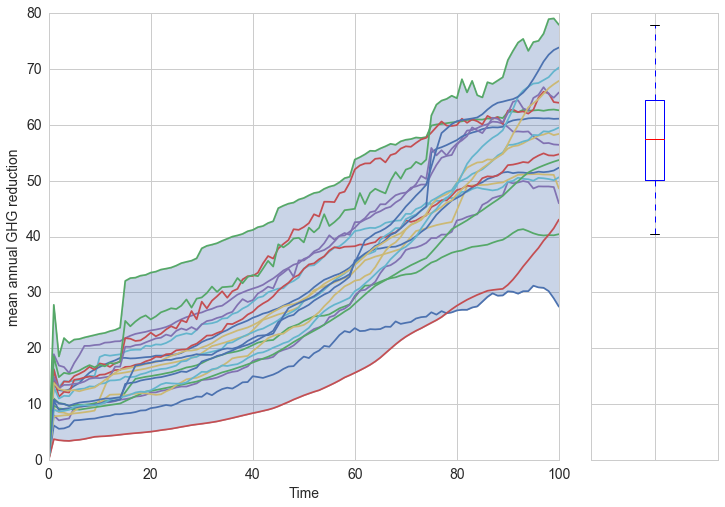

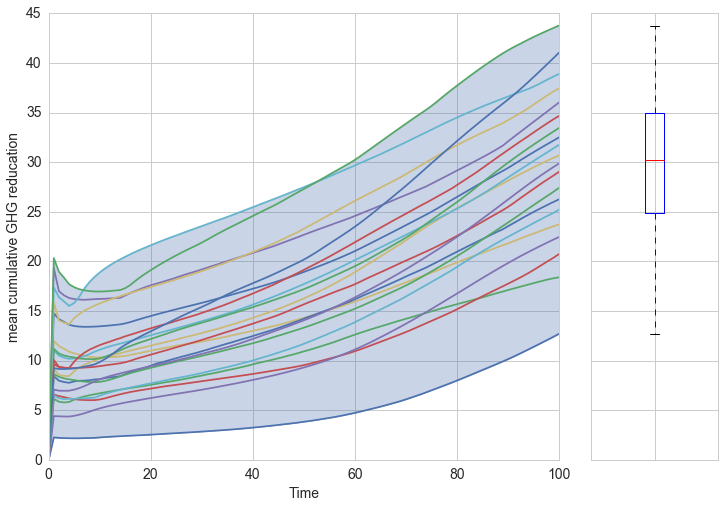

In [28]:
from ema_workbench.analysis.plotting_util import HIST, BOXPLOT

experiments, outcomes = results
oois = [u'AnnualGHGreduction_mean', u'CumulativeGHGreduction_mean']

ylabels = {u'AnnualGHGreduction_mean': 'mean annual GHG reduction',
           u'CumulativeGHGreduction_mean': 'mean cumulative GHG reducation'}

for i, ooi in enumerate(oois):
    data_to_sort_by = outcomes[ooi][:,-1]
    indices = np.argsort(data_to_sort_by)
    indices = indices[1:indices.shape[0]:50]  
    fig, axes = lines(results, outcomes_to_show=ooi, density=BOXPLOT, 
                      show_envelope=True, experiments_to_show=indices,
                     titles=None, ylabels=ylabels)
    density_ax = axes['{}_density'.format(ooi)]
    density_ax.set_xticklabels([])
    
    change_fontsize(fig)
    save_fig(fig, './figs', 'fig5{}'.format(chr(i + ord('a'))))

plt.show()

## 3. Joint visualising of the model outcomes 
In this section model outcomes are plotted against each other. All outcomes are plotted against the cumulative GHG reduction, since this is the most important outcome of the model and the other outcomes can reveal certain cause-relations. Two other outcomes are plotted against each other to test certain hypothesis.  

    * Annual GHG reduction - Cumulative GHG reduction
    * Bottom-up mitigation ratio - Cumulative GHG reduction
    * Total agreement effect - Cumulative GHG reduction
    * Total climate disaster effect - Cumulative GHG reduction

Hypothesis 1: The occurence of climate disasters has an overall positive effect on the outcome of international negotiations, since a temporary increase in climate change awareness could just push a government over the treshold of participating to an agreement.  
    * Total climate disaster effect - Total agreement effect
Hypothesis 2: The failure of agreements could have a positive effect on the bottom-up mitigation ratio, if individuals have the feeling "if you guys don't take responsibility, we'll do it then"
    * Total agreement effect - Bottom-up mitigation ratio

**Visualisation**

The joint plots are visualised by a Kernal density of the 
    
**Conclusion**

The results show that there is a strong correlation between annual GHG reduction and cumulative GHG reduction and total agreement effect and cumulative GHG reduction. There is a medium correlation between bottom-up mitigation ratio and cumulative GHG reduction and a low correlation between total climate disaster effect and cumulative GHG reduction. 

* Annual GHG reduction - Cumulative GHG reduction
    * Pearson = 0.67, significant
* Bottom-up mitigation ratio - Cumulative GHG reduction
    * Pearson = -0.28, significant 
* Total agreement effect - Cumulative GHG reduction
    * Pearson = 0.81, significant
* Total climate disaster effect - Cumulative GHG reduction
    * Pearson = 0.085, significant
* Bottom-up mitigation ratio - Total agreement effect
    * Pearson = -0.20, significant 
* Total climate disaster effect - Total agreement effect
    * Pearson = 0.058, not significant

In [17]:
# Grid visualisation less usefull because of StDev outcomes.

experiments, outcomes = load_results(r'./data/full 1000 exp 100 rep.tar.gz')
tr = {}

# pairs_scatter((experiments, outcomes), filter_scalar=False)
# pairs_density((experiments, outcomes), filter_scalar=False)
# plt.show()

[INFO/MainProcess] results loaded succesfully from ./data/full 1000 exp 100 rep.tar.gz


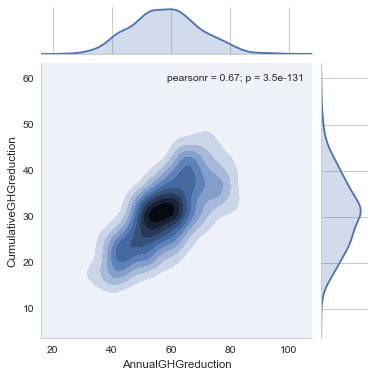

In [100]:
aghgr = outcomes['AnnualGHGreduction_mean'][:,-1]
cghgr = outcomes['CumulativeGHGreduction_mean'][:,-1]
g = sns.jointplot(aghgr,cghgr, kind="kde", size=5)
g.set_axis_labels("AnnualGHGreduction", "CumulativeGHGreduction")

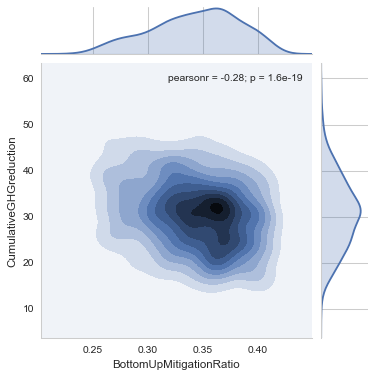

In [101]:
bmr = outcomes['BottomUpMitigationRatio_mean'][:,-1]
cghgr = outcomes['CumulativeGHGreduction_mean'][:,-1]
g = sns.jointplot(bmr, cghgr, kind="kde", size=5)
g.set_axis_labels("BottomUpMitigationRatio", "CumulativeGHGreduction")

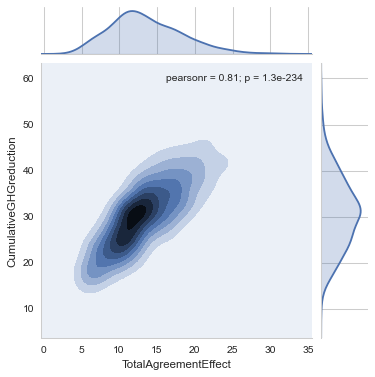

In [102]:
tae = outcomes['TotalAgreementEffect_mean'][:,-1]
cghgr = outcomes['CumulativeGHGreduction_mean'][:,-1]
g = sns.jointplot(tae, cghgr, kind="kde", size=5)
g.set_axis_labels("TotalAgreementEffect", "CumulativeGHGreduction")

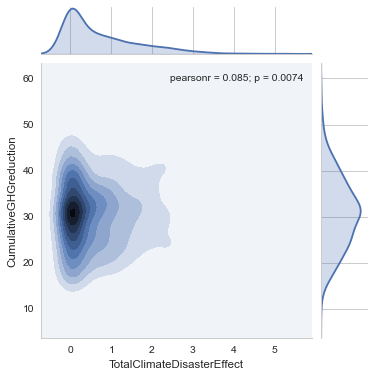

In [103]:
tcde = outcomes['TotalClimateDisasterEffect_mean'][:,-1]
cghgr = outcomes['CumulativeGHGreduction_mean'][:,-1]
g = sns.jointplot(tcde, cghgr, kind="kde", size=5)
g.set_axis_labels("TotalClimateDisasterEffect", "CumulativeGHGreduction")

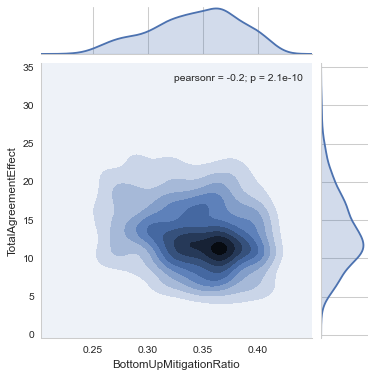

In [104]:
bmr = outcomes['BottomUpMitigationRatio_mean'][:,-1]
tae = outcomes['TotalAgreementEffect_mean'][:,-1]
g = sns.jointplot(bmr, tae, kind="kde", size=5)
g.set_axis_labels("BottomUpMitigationRatio", "TotalAgreementEffect")

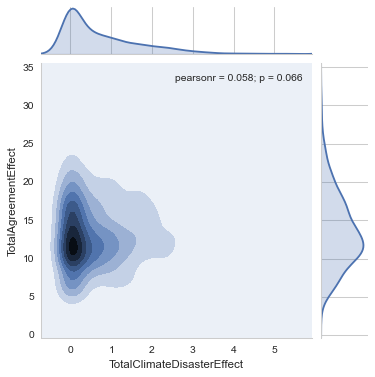

In [105]:
tcde = outcomes['TotalClimateDisasterEffect_mean'][:,-1]
tae = outcomes['TotalAgreementEffect_mean'][:,-1]
g = sns.jointplot(tcde, tae, kind="kde", size=5)
g.set_axis_labels("TotalClimateDisasterEffect", "TotalAgreementEffect")

## 3. PRIM analysis

### 3.1 PRIM analysis on cumulative GHG reductions

A PRIM analysis has been conducted on the high and low segment of cumulative GHG emission reduction. 

* High cumulative GHG reduction (>35%): ImpactFactor and ExpFactor low, ClimateDisasterIncreaseMitigation True
* A high cumulative GHG reduction will be reached when there is a high climate sensitivity and economic sensitivity of climate change, in combination with an increase in mitigation action if climate disasters occur.

* * *

* Low cumulative GHG reduction (<25%): ImpactFactor and ExpFactor high, ClimateDisasterIncreaseMitigation False
* A low cumulative GHG reduction will be reached when there is a high climate sensitivity and economic sensitivity of climate change, in combination with an increase in mitigation action if climate disasters occur.

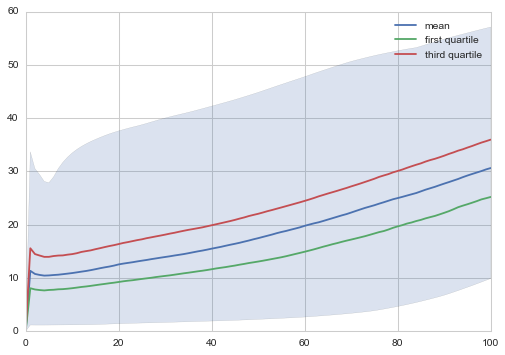

In [7]:
experiments, outcomes = results

data = outcomes['CumulativeGHGreduction_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [8]:
def classify(outcomes):
    outcome = outcomes['CumulativeGHGreduction_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome>35] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [9]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 281 cases of interest
[INFO/MainProcess] mean: 0.931034482759, mass: 0.058, coverage: 0.192170818505, density: 0.931034482759 restricted_dimensions: 13.0


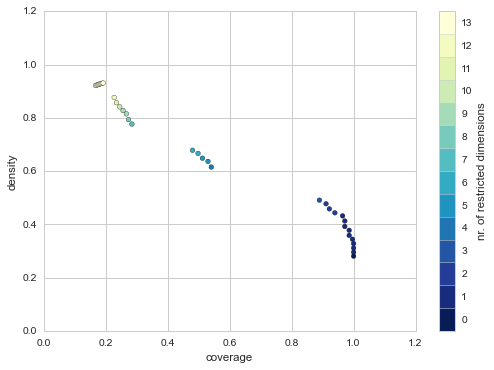

In [92]:
box1.show_tradeoff()
plt.show()

In [94]:
box1.inspect(13)
box1.inspect(14)
box1.inspect(19)

coverage    0.889680
density     0.491159
mass        0.509000
mean        0.491159
res dim     3.000000
Name: 13, dtype: float64

                   box 13                         
                      min        max     qp values
ImpactFactor     0.800157   1.050934  3.467310e-16
ExpFactor        1.010007   1.026924  1.519174e-02
TimeHorizonGov2  1.794725  49.953019  2.850485e-01

coverage    0.540925
density     0.615385
mass        0.247000
mean        0.615385
res dim     4.000000
Name: 14, dtype: float64

                                        box 14                           
                                           min          max     qp values
ImpactFactor                         0.8001573     1.050934  1.486229e-12
ClimateDisasterIncreaseMitigation  set([True])  set([True])  5.795876e-05
ExpFactor                             1.010007     1.026924    0.01167596
TimeHorizonGov2                       1.794725     49.95302     0.3175992

coverage    0.284698
density     0.77

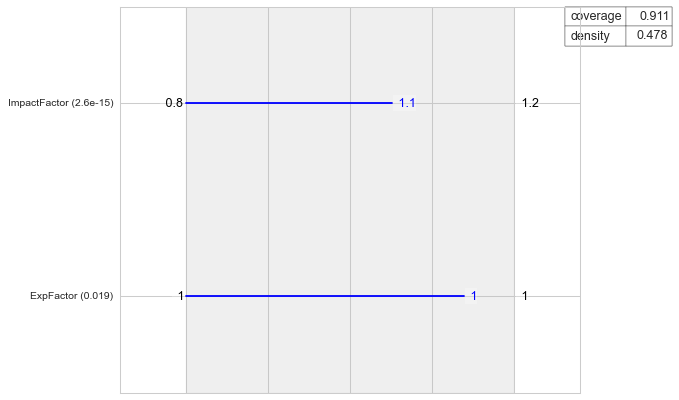

In [10]:
box1.select(13)
box1.drop_restriction('TimeHorizonGov2')
box1.inspect(style='graph')
plt.show()

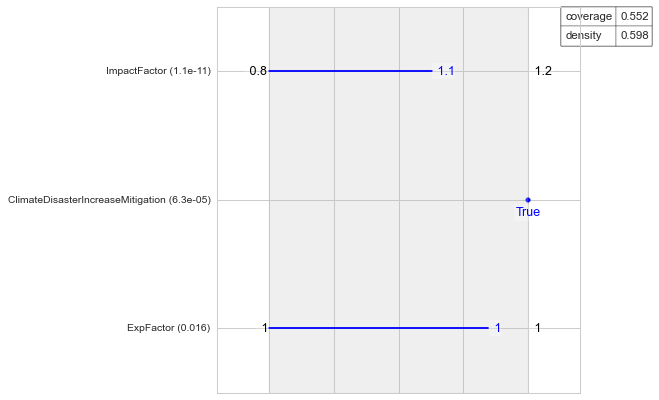

In [49]:
box1.select(14)
box1.drop_restriction('TimeHorizonGov2')
box1.inspect(style='graph')
plt.show()

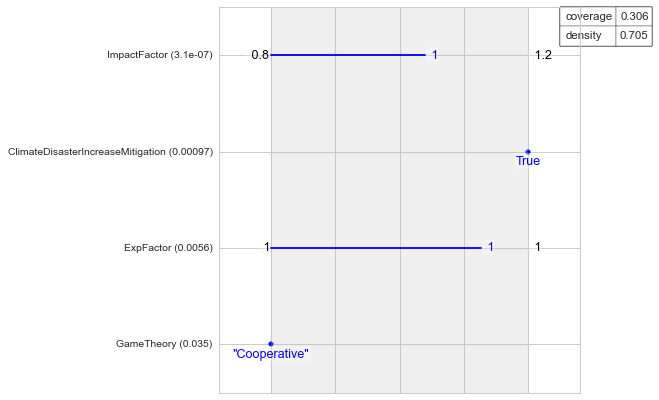

In [51]:
box1.select(19)
box1.drop_restriction('PredictionError')
box1.drop_restriction('TimeHorizonGov2')
box1.drop_restriction('DemocraticValue4')
box1.inspect(style='graph')
plt.show()

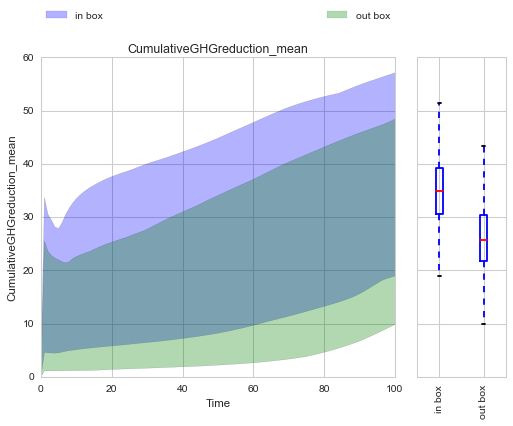

In [52]:
box1.select(13)

from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['CumulativeGHGreduction_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

In [11]:
def classify(outcomes):
    outcome = outcomes['CumulativeGHGreduction_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome<25] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [12]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 242 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.06, coverage: 0.247933884298, density: 1.0 restricted_dimensions: 11.0


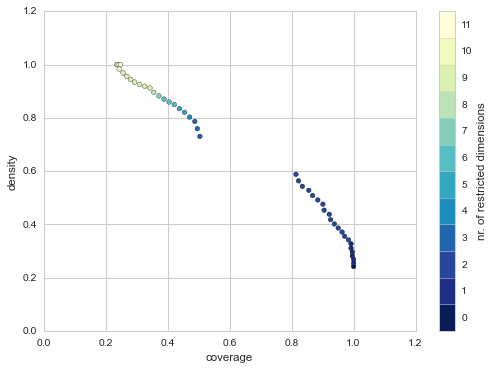

In [13]:
box1.show_tradeoff()
plt.show()

In [120]:
box1.inspect(21)
box1.inspect(24)

coverage    0.81405
density     0.58806
mass        0.33500
mean        0.58806
res dim     2.00000
Name: 21, dtype: float64

                box 21                        
                   min       max     qp values
ImpactFactor  1.016259  1.199635  6.738524e-26
ExpFactor     1.015506  1.029995  5.105224e-06

coverage    0.487603
density     0.786667
mass        0.150000
mean        0.786667
res dim     3.000000
Name: 24, dtype: float64

                                         box 24                            
                                            min           max     qp values
ImpactFactor                           1.030826      1.199635   1.66694e-22
ClimateDisasterIncreaseMitigation  set([False])  set([False])  4.537826e-06
ExpFactor                              1.015506      1.029995  1.007506e-05



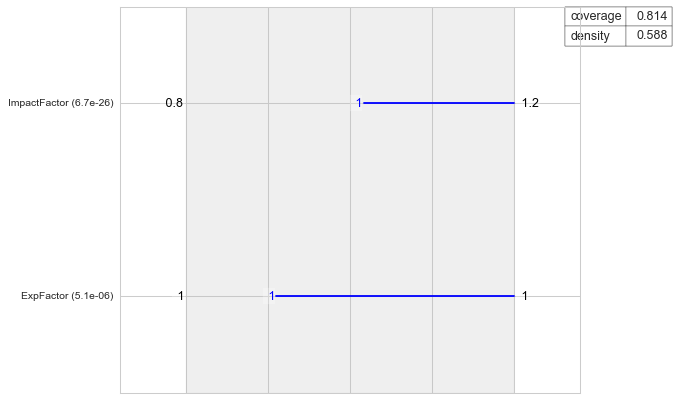

In [33]:
box1.inspect(21, style='graph')
plt.show()

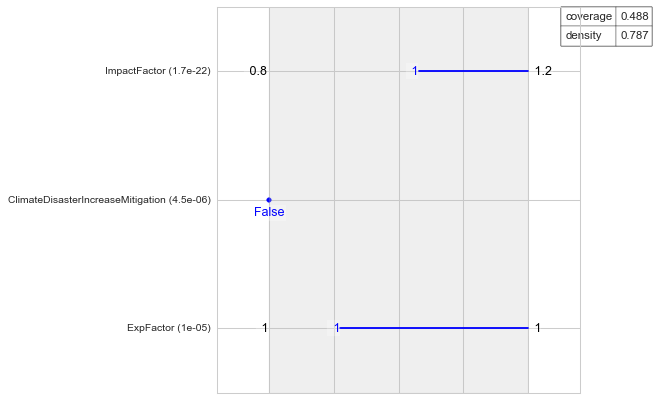

In [35]:
box1.inspect(24, style='graph')
plt.show()

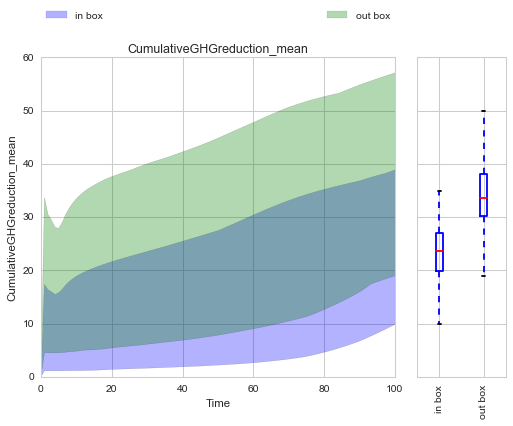

In [38]:
box1.select(21)

from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['CumulativeGHGreduction_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

## PRIM on Annual GHG emission reduction

A PRIM analysis has been conducted on the high and low segment of annual GHG emission reduction. The results are basicly similar to the results of the PRIM analysis on cumulative GHG reduction.

* Annual cumulative GHG reduction (>65%): ImpactFactor, ClimateDisasterIncreaseMitigation True
* A high cumulative GHG reduction will be reached when there is a high climate sensitivity and economic sensitivity of climate change, in combination with an increase in mitigation action if climate disasters occur.

* * *

* Annual cumulative GHG reduction (<50%): ImpactFactor and ExpFactor high, ClimateDisasterIncreaseMitigation False
* A low cumulative GHG reduction will be reached when there is a high climate sensitivity and economic sensitivity of climate change, in combination with an increase in mitigation action if climate disasters occur.

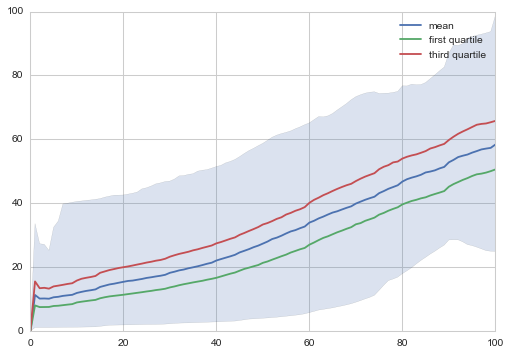

In [37]:
experiments, outcomes = results

data = outcomes['AnnualGHGreduction_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [15]:
def classify(outcomes):
    outcome = outcomes['AnnualGHGreduction_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome>65] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [16]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 271 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.081, coverage: 0.29889298893, density: 1.0 restricted_dimensions: 9.0


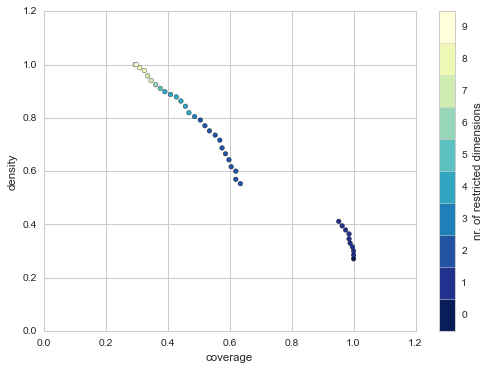

In [41]:
box1.show_tradeoff()
plt.show()

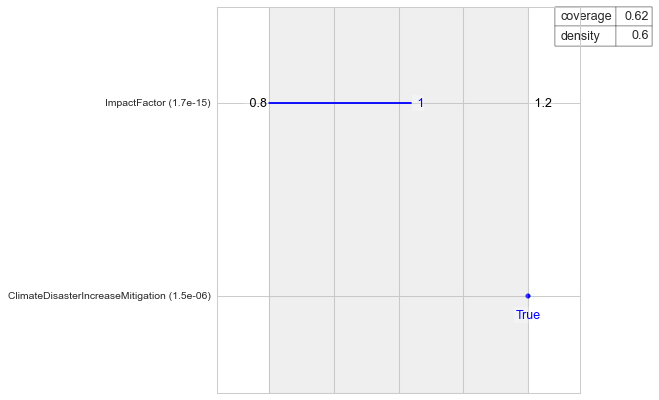

In [43]:
box1.inspect(12, style='graph')
plt.show()

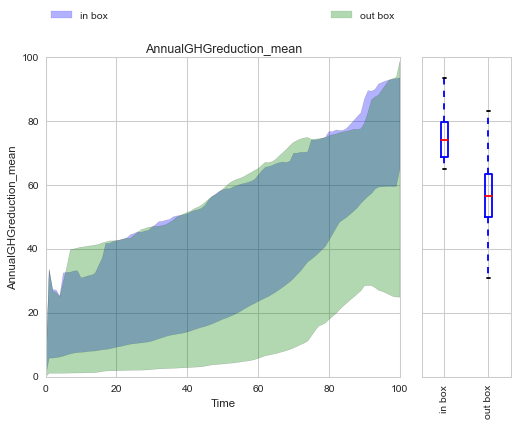

In [44]:
from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['AnnualGHGreduction_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

In [17]:
def classify(outcomes):
    outcome = outcomes['AnnualGHGreduction_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome<50] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [18]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 233 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.057, coverage: 0.244635193133, density: 1.0 restricted_dimensions: 7.0


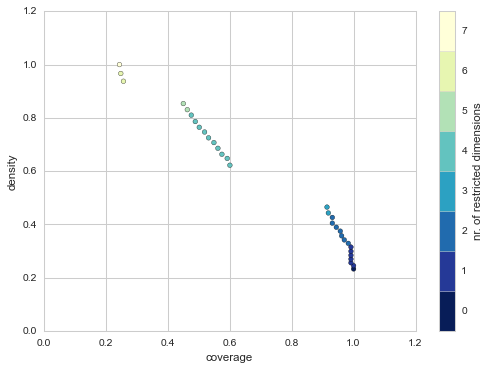

In [57]:
box1.show_tradeoff()
plt.show()

In [58]:
box1.inspect(15)
box1.inspect(17)
box1.inspect(30)

coverage    0.914163
density     0.465066
mass        0.458000
mean        0.465066
res dim     3.000000
Name: 15, dtype: float64

                               box 15                        
                                  min       max     qp values
ImpactFactor                 0.986015  1.199635  5.759216e-20
ExpFactor                    1.012060  1.029995  5.198948e-02
MitigationEnforcementFactor  0.200114  0.960279  2.084553e-01

coverage    0.592275
density     0.647887
mass        0.213000
mean        0.647887
res dim     4.000000
Name: 17, dtype: float64

                                         box 17                            
                                            min           max     qp values
ImpactFactor                             0.9993      1.199635  4.753206e-17
ClimateDisasterIncreaseMitigation  set([False])  set([False])  1.416341e-06
ExpFactor                               1.01206      1.029995    0.04867758
MitigationEnforcementFactor           0.2001137

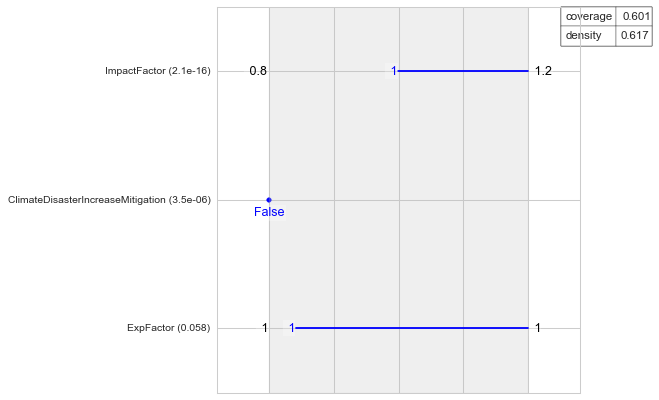

In [60]:
box1.select(17)
box1.drop_restriction('MitigationEnforcementFactor')
box1.inspect(style='graph')
plt.show()

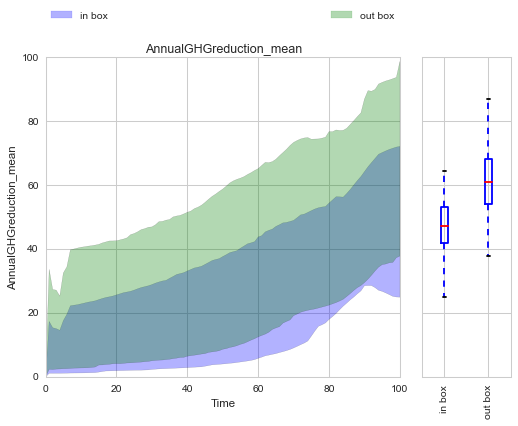

In [61]:
from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['AnnualGHGreduction_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

## PRIM analysis on bottom up mitigation ratio

A PRIM analysis has been conducted on the high and low segment of the bottom-up mitigation ratio. 

* High bottom-up mitigation ratio (>0.38): Low mitigation enforcement factor, Prisoners Gametheory 
* A high bottom-up mitigation ratio will be reached when top-down initiative on climate change response is weak. If the international negotiations on climate change response are subject to free-rider behaviour, stimulated by the Prisoners game theory behind the negotiations, and if the mitigation agreements resulting from these negotiations are weak due to the low mitigation enforcement factor, the bottom-up mitigation ratio will be high. This implies that individuals will step-up if their governments not do so in the because of international politics. 

* * *

* Low bottom-up mitigation ratio (<0.32): High mitigation enforcement factor, Cooperative Gametheory 
* A low bottom-up mitigation ratio will be reached when international negotiations on climate change response are succesful. A cooperative game theory behind the negotiations, in combination with a high mitigation enforcement factor, increase the effect of top-down mitigation action, thereby decreasing the bottom-up mitigation ratio.

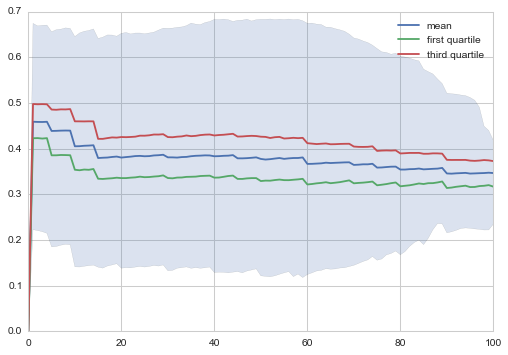

In [9]:
experiments, outcomes = results

data = outcomes['BottomUpMitigationRatio_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [17]:
def classify(outcomes):
    outcome = outcomes['BottomUpMitigationRatio_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome>0.38] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [18]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 184 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.08, coverage: 0.434782608696, density: 1.0 restricted_dimensions: 10.0


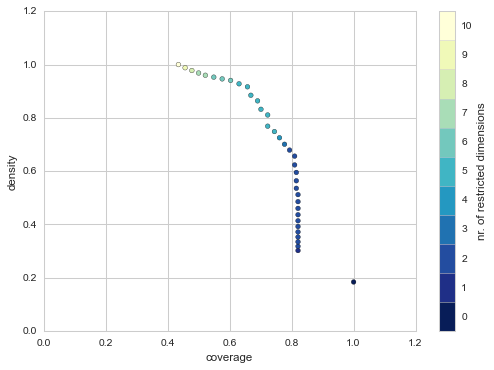

In [64]:
box1.show_tradeoff()
plt.show()

In [22]:
box1.inspect(17)

coverage    0.793478
density     0.679070
mass        0.215000
mean        0.679070
res dim     2.000000
Name: 17, dtype: float64

                                         box 17                      \
                                            min                 max   
MitigationEnforcementFactor           0.2001137           0.5227713   
GameTheory                   set(["Prisoners"])  set(["Prisoners"])   

                                           
                                qp values  
MitigationEnforcementFactor  5.863133e-30  
GameTheory                   1.525226e-12  



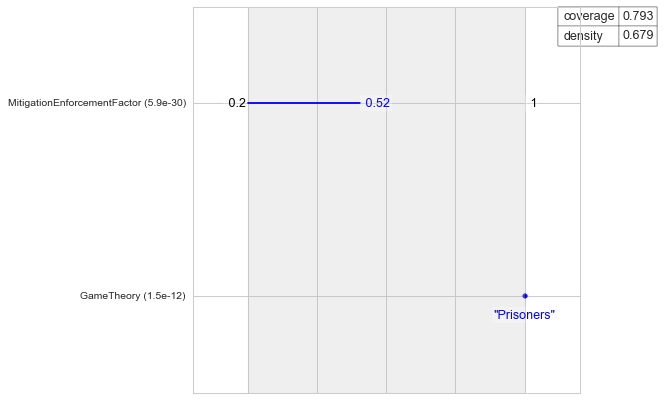

In [55]:
box1.inspect(17, style='graph')
plt.show()

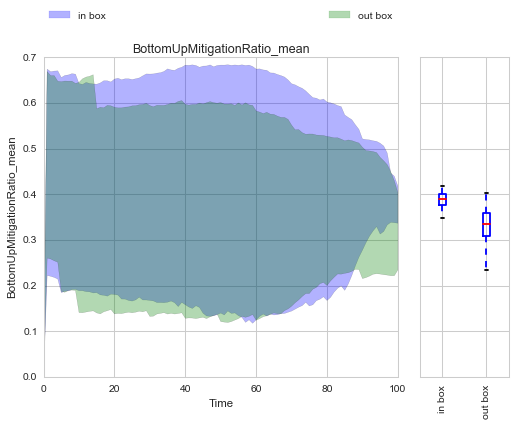

In [56]:
box1.select(17)

from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['BottomUpMitigationRatio_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

In [28]:
def classify(outcomes):
    outcome = outcomes['BottomUpMitigationRatio_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome<0.32] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [29]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 274 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.074, coverage: 0.270072992701, density: 1.0 restricted_dimensions: 11.0


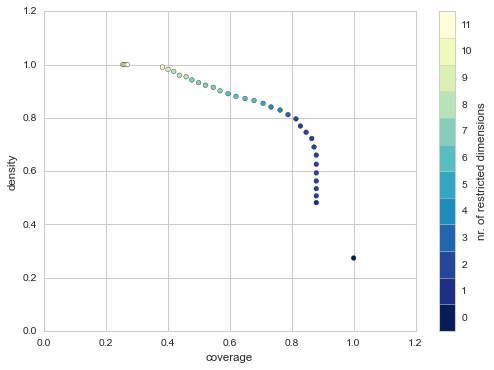

In [30]:
box1.show_tradeoff()
plt.show()

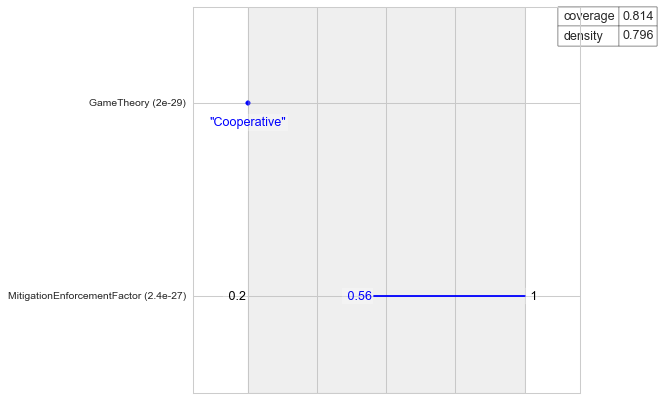

In [59]:
box1.inspect(12, style='graph')
plt.show()

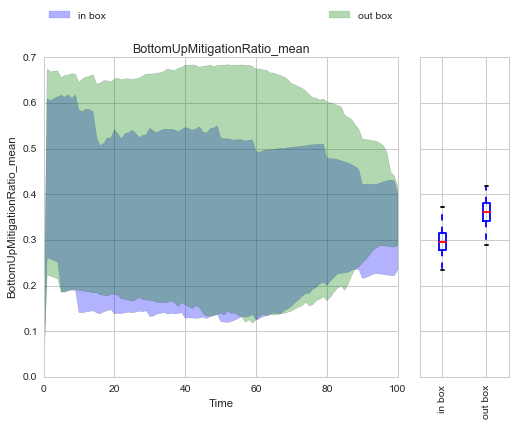

In [60]:
box1.select(12)

from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['BottomUpMitigationRatio_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

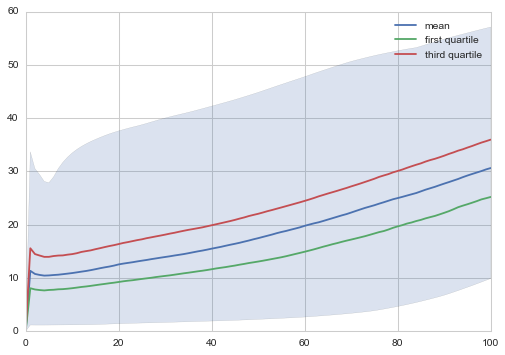

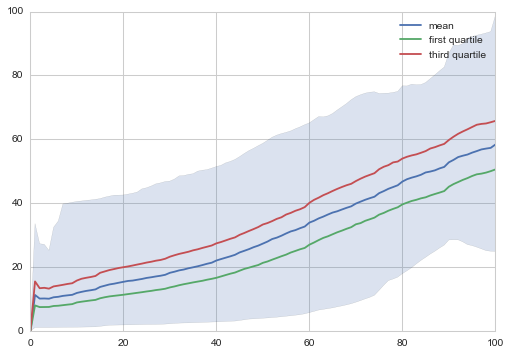

In [7]:
experiments, outcomes = results

data = outcomes['CumulativeGHGreduction_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

experiments, outcomes = results

data = outcomes['AnnualGHGreduction_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

## PRIM on Total Agreement Effect

A PRIM analysis has been conducted on the high and low segment of the total agreement effect. 

* High total agreement effect (>17): low ImpactFactor, Cooperative Gametheory 
* A high total agreement effect will be reached under a high climate sensitivity and economic sensitivity of climate change in combination with a cooperative game theory behind the international negotiations on climate change response. This result can be easily understood, as a high climate sensitivity and economic sensitivity of climate change increase the climate change awareness of governments, thereby increasing the chance that they will participate to mitigation agreements. Cooperative game theory is more beneficial for the outcome of the negotiations.

* * *

* Low total agreement effect (<10): Prisoners GameTheory, ClimateDisasterIncreaseMitigation False, high ImpactFactor, high ExpFActor
* A low total agreement effect is caused by a low climate sensitivity and economic sensitivity of climate change, in combination with a prisoners game theory behind the negotiations and climate disasters decreasing mitigation action. The latter result is surprising, but can be explained as follows: if a climate disaster occurs just before international negotiations on climate change response, and the effect on climate change awareness is negative, governments struck by the climate disaster are less willing to participate to mitigation agreements.

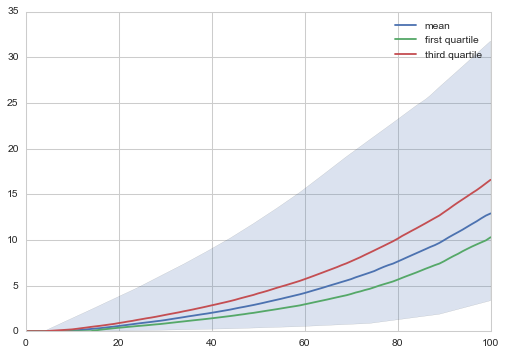

In [31]:
experiments, outcomes = results

data = outcomes['TotalAgreementEffect_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [32]:
def classify(outcomes):
    outcome = outcomes['TotalAgreementEffect_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome>17] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [33]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 221 cases of interest
[INFO/MainProcess] mean: 0.884057971014, mass: 0.069, coverage: 0.276018099548, density: 0.884057971014 restricted_dimensions: 14.0


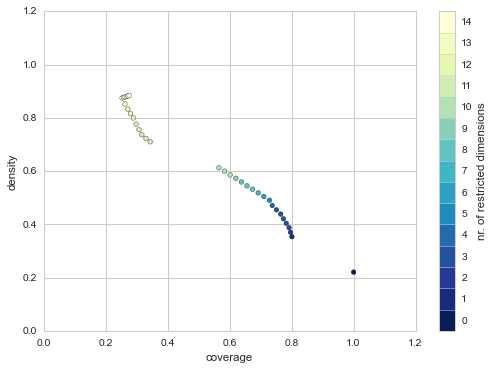

In [34]:
box1.show_tradeoff()
plt.show()

In [36]:
box1.inspect(1)
box1.inspect(9)
box1.inspect(19)

coverage    0.800905
density     0.354000
mass        0.500000
mean        0.354000
res dim     1.000000
Name: 1, dtype: float64

                           box 1                                    
                             min                   max     qp values
GameTheory  set(["Cooperative"])  set(["Cooperative"])  8.452117e-12

coverage    0.728507
density     0.490854
mass        0.328000
mean        0.490854
res dim     5.000000
Name: 9, dtype: float64

                                box 9                                    
                                  min                   max     qp values
GameTheory       set(["Cooperative"])  set(["Cooperative"])  1.017509e-12
ImpactFactor                0.8001573              1.110475  0.0001687109
TimeHorizonGov4              2.761866              49.95115     0.2364798
TimeHorizonGov2              2.235386              49.95302     0.2539963
ExpFactor                    1.010007              1.029042     0.2720593

coverage     

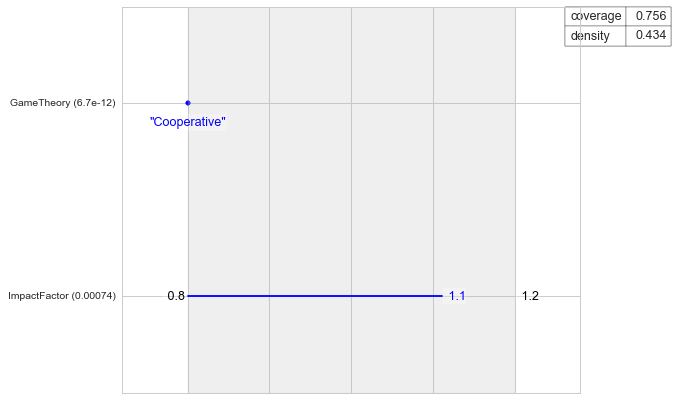

In [65]:
box1.select(9)
box1.drop_restriction('ExpFactor')
box1.drop_restriction('TimeHorizonGov2')
box1.drop_restriction('TimeHorizonGov4')
box1.inspect(style='graph')
plt.show()

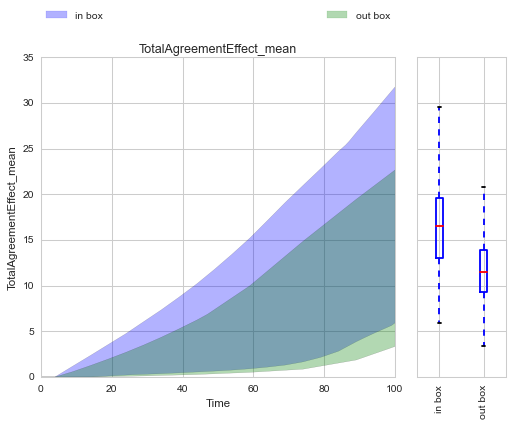

In [66]:
from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['TotalAgreementEffect_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

In [37]:
def classify(outcomes):
    outcome = outcomes['TotalAgreementEffect_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome<10] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [38]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 229 cases of interest
[INFO/MainProcess] mean: 0.963636363636, mass: 0.055, coverage: 0.231441048035, density: 0.963636363636 restricted_dimensions: 11.0


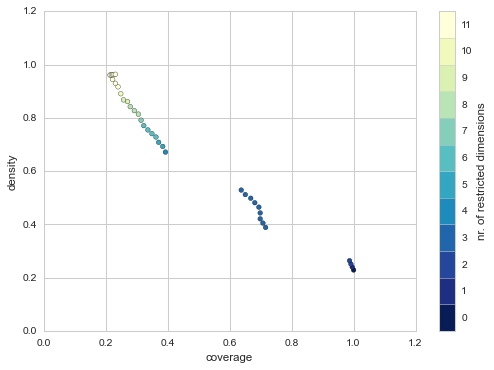

In [39]:
box1.show_tradeoff()
plt.show()

In [69]:
box1.inspect(3)
box1.inspect(8)
box1.inspect(13)

coverage    0.986900
density     0.264019
mass        0.856000
mean        0.264019
res dim     2.000000
Name: 3, dtype: float64

                 box 3                     
                   min       max  qp values
ImpactFactor  0.841715  1.199635   0.055346
ExpFactor     1.010998  1.029995   0.224385

coverage    0.694323
density     0.464912
mass        0.342000
mean        0.464912
res dim     3.000000
Name: 8, dtype: float64

                           box 8                                  
                             min                 max     qp values
GameTheory    set(["Prisoners"])  set(["Prisoners"])  1.281429e-08
ImpactFactor           0.8941438            1.199635  0.0001000979
ExpFactor               1.011958            1.029995    0.06336166

coverage    0.393013
density     0.671642
mass        0.134000
mean        0.671642
res dim     4.000000
Name: 13, dtype: float64

                                               box 13                      \
                   

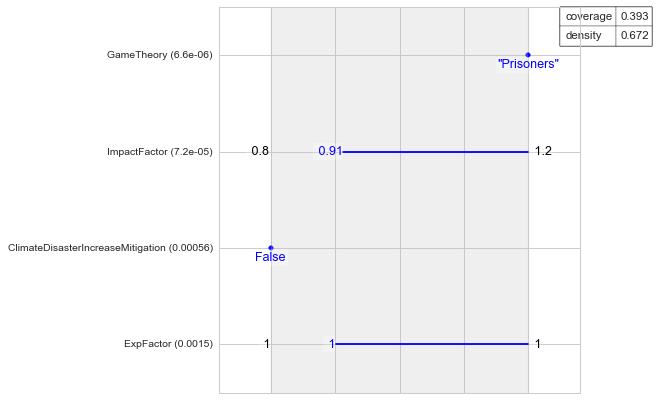

In [70]:
box1.inspect(13, style='graph')
plt.show()

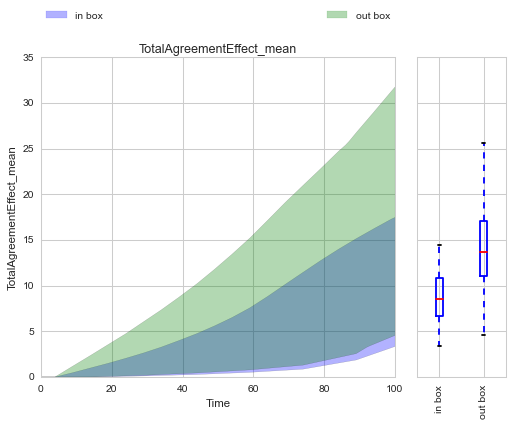

In [71]:
box1.select(13)

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['TotalAgreementEffect_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

## PRIM on Total Climate Disaster Effect

A PRIM analysis has been conducted on the high and low segment of the total climate disaster effect. 

* High total agreement effect (>17): ClimateDisasterMemory 5, High InitialSeverityOfClimateDisaster 

* * *

* Low total agreement effect (<10): Prisoners GameTheory, ClimateDisasterIncreaseMitigation False, high ImpactFactor, high ExpFActor
* A low total agreement effect is caused by a low climate sensitivity and economic sensitivity of climate change, in combination with a prisoners game theory behind the negotiations and climate disasters decreasing mitigation action. The latter result is surprising, but can be explained as follows: if a climate disaster occurs just before international negotiations on climate change response, and the effect on climate change awareness is negative, governments struck by the climate disaster are less willing to participate to mitigation agreements.

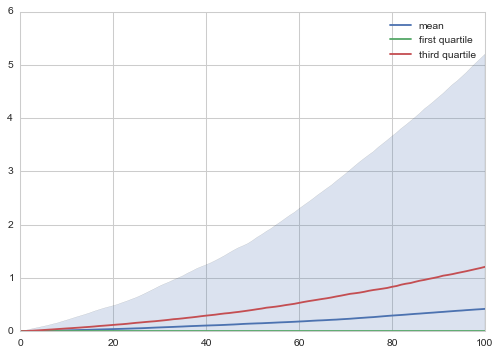

In [40]:
experiments, outcomes = results

data = outcomes['TotalClimateDisasterEffect_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [41]:
def classify(outcomes):
    outcome = outcomes['TotalClimateDisasterEffect_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome>1.5] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [42]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 196 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.067, coverage: 0.341836734694, density: 1.0 restricted_dimensions: 8.0


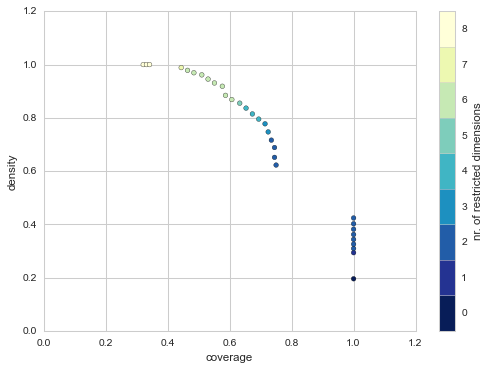

In [43]:
box1.show_tradeoff()
plt.show()

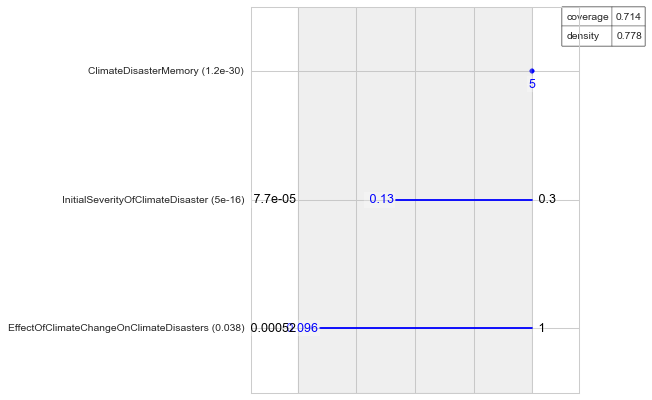

In [76]:
box1.inspect(14, style='graph')
plt.show()

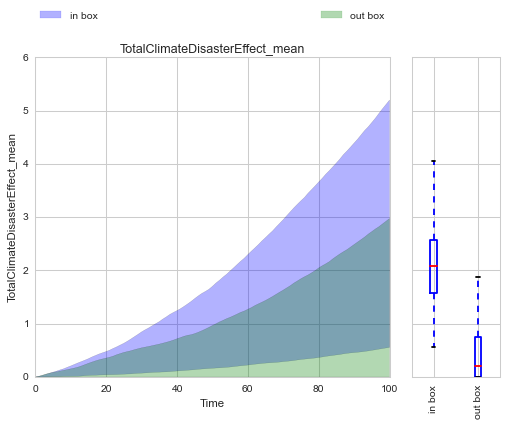

In [77]:
box1.select(14)

from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['TotalClimateDisasterEffect_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

In [44]:
def classify(outcomes):
    outcome = outcomes['TotalClimateDisasterEffect_mean'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome<0.005] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

In [45]:
box1 = prim_obj.find_box()
box1.show_tradeoff()
mpld3.display()

[INFO/MainProcess] 1000 points remaining, containing 334 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.333, coverage: 0.997005988024, density: 1.0 restricted_dimensions: 1.0


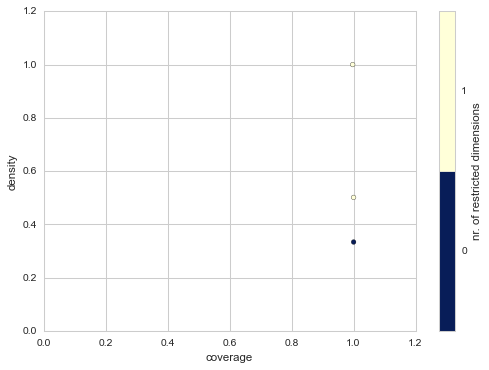

In [46]:
box1.show_tradeoff()
plt.show()

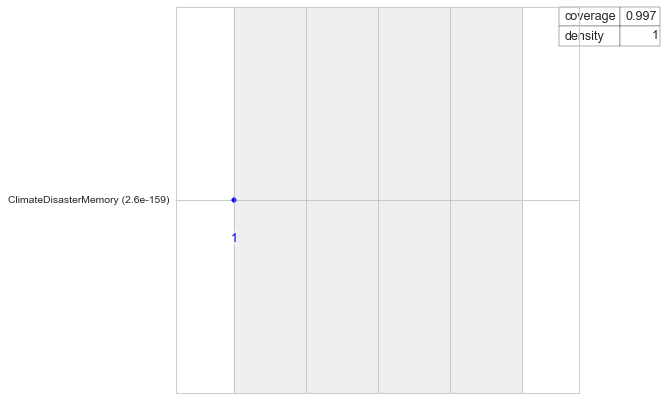

In [49]:
box1.inspect(2, style='graph')
plt.show()

C:\Users\Sebas\Documents\GitHub\EMAworkbench\src\analysis\plotting_util.py:445: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if time==None:


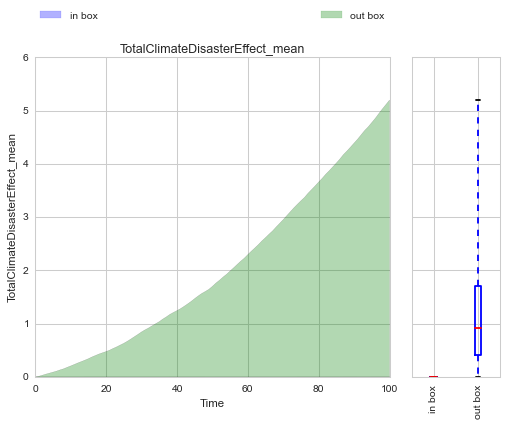

In [50]:
box1.select(2)

from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['TotalClimateDisasterEffect_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

# PRIM on annual GHG reduction SD

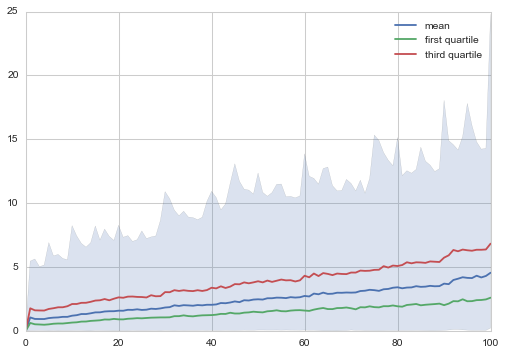

In [117]:
experiments, outcomes = results

data = outcomes['AnnualGHGreduction_std']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.median(data, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data.shape[1]),np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data, 75, axis=0), label='third quartile')

ax.legend()
plt.show()

In [120]:
def classify(outcomes):
    outcome = outcomes['AnnualGHGreduction_std'][:,-1]
    classes = np.zeros(outcome.shape)
    classes[outcome>9] = 1
    return classes

prim_obj = Prim(results, classify, threshold=0.8)

[INFO/MainProcess] 1000 points remaining, containing 105 cases of interest
[INFO/MainProcess] mean: 0.849056603774, mass: 0.053, coverage: 0.428571428571, density: 0.849056603774 restricted_dimensions: 7.0


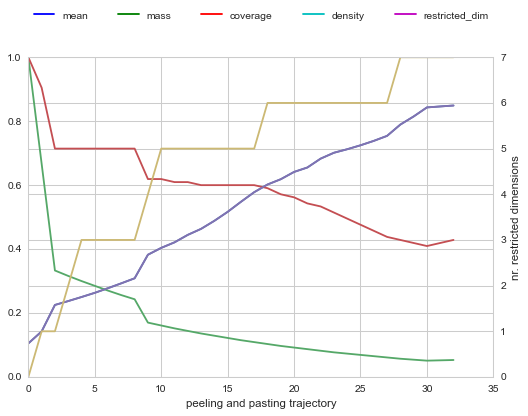

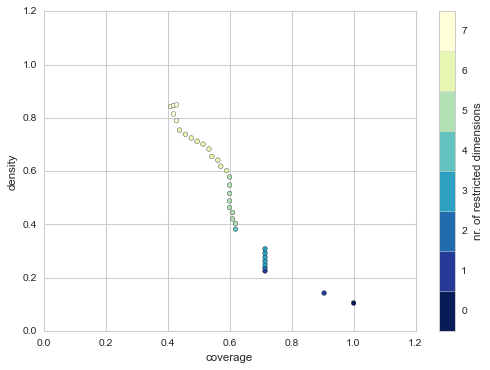

In [121]:
box1 = prim_obj.find_box()
box1.show_ppt()
plt.show()
box1.show_tradeoff()
plt.show()

In [122]:
box1.inspect(17)

coverage    0.600000
density     0.577982
mass        0.109000
mean        0.577982
res dim     5.000000
Name: 17, dtype: float64

                                             box 17                \
                                                min           max   
EmissionMemory                             set([1])      set([1])   
InitialSeverityOfClimateDisaster          0.1467416     0.2998628   
YearsBetweenInternationalNegotiations  set([10, 5])  set([10, 5])   
DemocraticValue2                       7.462146e-06     0.9302329   
DemocraticValue3                       0.0002786151     0.9353999   

                                                     
                                          qp values  
EmissionMemory                         6.199865e-12  
InitialSeverityOfClimateDisaster       6.152167e-08  
YearsBetweenInternationalNegotiations    0.02940297  
DemocraticValue2                          0.3706606  
DemocraticValue3                          0.4962668  



In [124]:
box1.select(17)
box1.drop_restriction('DemocraticValue2')
box1.drop_restriction('DemocraticValue3')
box1.inspect()

coverage    0.600000
density     0.552632
mass        0.114000
mean        0.552632
res dim     3.000000
Name: 36, dtype: float64

                                             box 36                \
                                                min           max   
EmissionMemory                             set([1])      set([1])   
InitialSeverityOfClimateDisaster          0.1467416     0.2998628   
YearsBetweenInternationalNegotiations  set([10, 5])  set([10, 5])   

                                                     
                                          qp values  
EmissionMemory                         9.449044e-13  
InitialSeverityOfClimateDisaster       5.309024e-09  
YearsBetweenInternationalNegotiations    0.03747551  



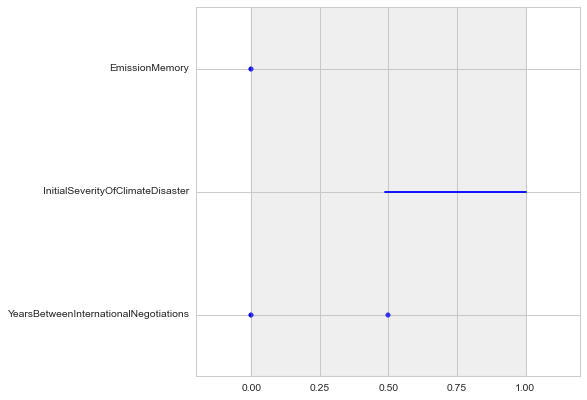

In [125]:
prim_obj.show_boxes()
plt.show()

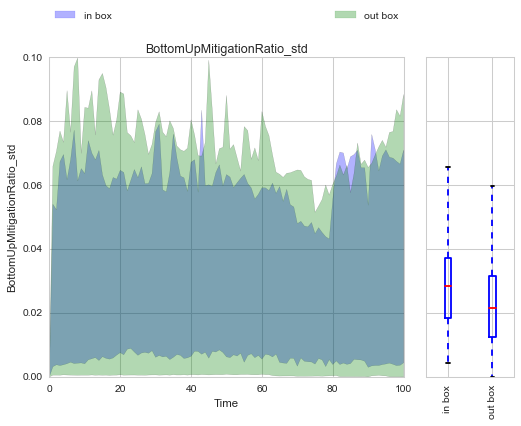

In [128]:
from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['BottomUpMitigationRatio_std'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

### Uncertainty space reduction analysis

In [65]:
from analysis.prim import Prim

def classify(data):
    outcome = data['AnnualGHGreduction_mean']
    outcome_30 = outcome[:, 30]
    
    logical = (outcome_30 >= 10) & (outcome_30 <= 30)
    
    classes = np.zeros(outcome_30.shape)
    classes[logical] = 1
    
    return classes

prim_obj = Prim(results, classify, threshold=0.8)
box1 = prim_obj.find_box()


[INFO/MainProcess] 1000 points remaining, containing 839 cases of interest
[INFO/MainProcess] mean: 1.0, mass: 0.144, coverage: 0.171632896305, density: 1.0 restricted_dimensions: 11.0


In [67]:
box1.show_tradeoff()
mpld3.display()

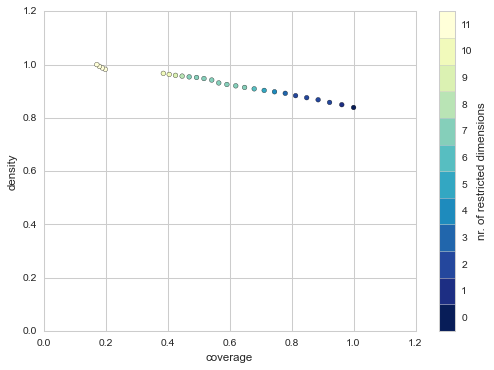

In [68]:
box1.show_tradeoff()
plt.show()

In [73]:
box1.inspect(5)

coverage    0.812872
density     0.883420
mass        0.772000
mean        0.883420
res dim     2.000000
Name: 5, dtype: float64

                 box 5                     
                   min       max  qp values
ImpactFactor  0.835631  1.160358    0.00388
ExpFactor     1.010007  1.029000    0.21233



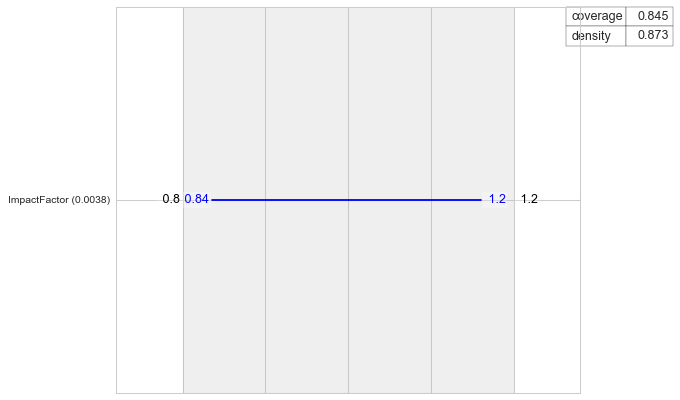

In [76]:
box1.select(5)
box1.drop_restriction('ExpFactor')
box1.inspect(style='graph')
plt.show()

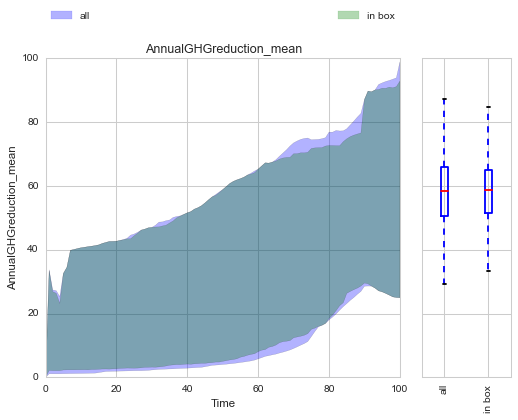

In [80]:
from analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
# gs['out box'] = out_box
gs['all'] = all_indices

envelopes(results, outcomes_to_show=['AnnualGHGreduction_mean'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()